<a href="https://colab.research.google.com/github/CODERdeeps/MLCDAC/blob/main/m1preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('/content/Levels_Fyi_Salary_Data.csv')

In [69]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


In [71]:
print("The dataset contains following number of records for each of the columns : \n" +str(df.count()))

The dataset contains following number of records for each of the columns : 
timestamp                  62642
company                    62637
level                      62523
title                      62642
totalyearlycompensation    62642
location                   62642
yearsofexperience          62642
yearsatcompany             62642
tag                        61788
basesalary                 62642
stockgrantvalue            62642
bonus                      62642
gender                     43102
otherdetails               40137
cityid                     62642
dmaid                      62640
rowNumber                  62642
Masters_Degree             62642
Bachelors_Degree           62642
Doctorate_Degree           62642
Highschool                 62642
Some_College               62642
Race_Asian                 62642
Race_White                 62642
Race_Two_Or_More           62642
Race_Black                 62642
Race_Hispanic              62642
Race                       22427


In [72]:
df = df.dropna()

In [73]:
df = df.drop_duplicates()

In [74]:
df.shape

(21521, 29)

In [75]:
df.drop(columns=["Education"])

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,0,1,0,0,1,0,0,0,0,Asian
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,1,0,0,0,0,0,1,0,0,Two Or More
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,1,0,0,0,1,0,0,0,0,Asian
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,0,1,0,0,0,0,Asian
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,1,0,0,0,0,1,0,0,0,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2/15/2021 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000.0,...,1,0,0,0,1,0,0,0,0,Asian
61982,3/9/2021 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,...,0,0,0,0,1,0,0,0,0,Asian
61984,3/25/2021 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000.0,...,0,0,0,0,0,1,0,0,0,White
61987,5/18/2021 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000.0,...,0,0,0,0,0,0,0,1,0,Black


In [76]:
# Save the cleaned data
df.to_csv("cleaned_data.csv", index=False)

In [77]:
df.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

In [78]:
dfc = pd.read_csv('/content/cleaned_data.csv')

In [79]:
dfc.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
1,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
2,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
3,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
4,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [80]:
dfc.shape

(21521, 29)

In [81]:
import seaborn as sns 

<ipython-input-82-5acf4347421e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dfc.corr()


<Axes: >

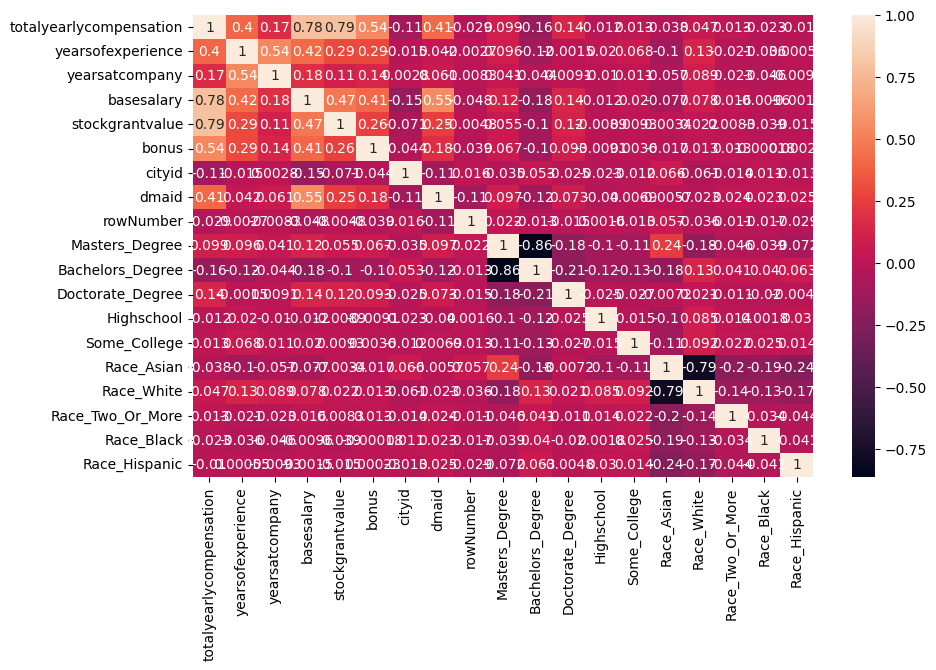

In [82]:
cor = dfc.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor , annot = True)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<BarContainer object of 29 artists>

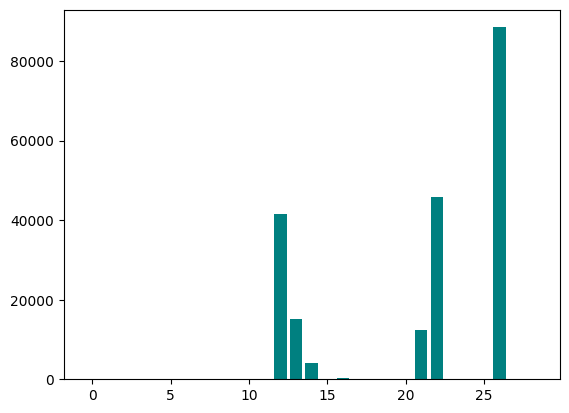

In [83]:
m_a_d = np.sum(np.abs(dfc -np.mean(dfc, axis=0)), axis=0)/dfc.shape[0]
plt.bar(np.arange(dfc.shape[1]),m_a_d,color='teal')

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split

In [118]:
X = dfc[['yearsofexperience']]  #X, y = np.arange(10).reshape((5, 2)), range(5)

In [119]:
Y = dfc[['bonus']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [121]:
X_train

,yearsofexperience
19698,1.0
2947,6.0
5859,10.0
2840,13.0
15091,2.0
...,...
11284,6.0
11964,1.0
5390,4.0
860,3.0


In [122]:
X_test

,yearsofexperience
423,13.0
3111,4.0
19700,15.0
20586,17.0
10489,4.0
...,...
20793,1.0
18148,6.0
10098,16.0
17242,7.0


In [123]:
Y_train

15710    400000
23532    136000
23533    337000
23534    222000
23535    187000
          ...  
61423    279000
61424    165000
61425    200000
61429    221000
61431     74000
Name: totalyearlycompensation, Length: 21271, dtype: int64

In [124]:
Y_test

61433     173000
61435     174000
61437     700000
61438      47000
61441      81000
          ...   
61981    1470000
61982    4500000
61984    1605000
61987    2372000
61991    4980000
Name: totalyearlycompensation, Length: 250, dtype: int64

In [125]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
reg = LinearRegression().fit(X, Y)

In [159]:
m = reg.score(X, Y)


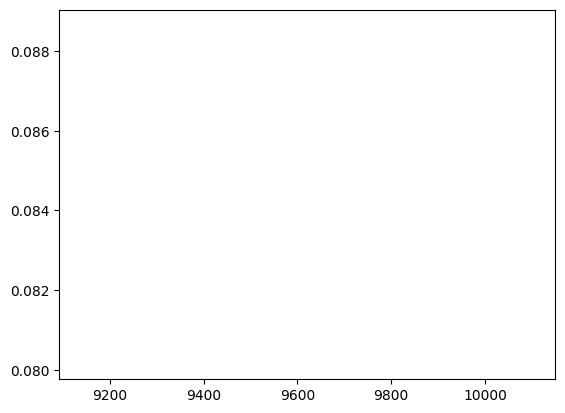

In [160]:
l = reg.intercept_
plt.plot(l, m,color="green",linewidth=3)

In [143]:
Y_pred = reg.predict(np.array([[5]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [145]:
Y_pred

array([[15779.93078726]])

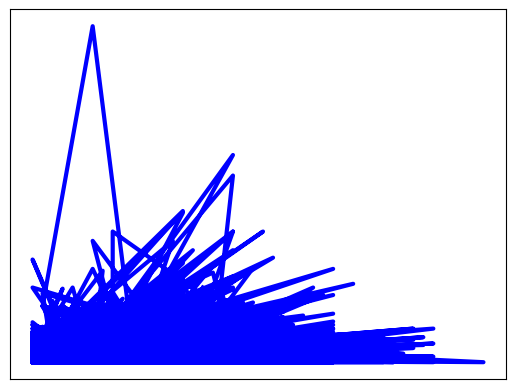

In [155]:
# Plot outputs

plt.plot(X,Y, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [161]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
for train, test in kf.split(X):
 print("%s %s" % (train, test))

[10761 10762 10763 ... 21518 21519 21520] [    0     1     2 ... 10758 10759 10760]
[    0     1     2 ... 10758 10759 10760] [10761 10762 10763 ... 21518 21519 21520]


In [166]:
#better performance in Cross validation technique